## Exploratory Data Analysis on the dataset for Causal Inference

#### Importing all the necessary libraries and modules

In [1]:
conda install  -c conda-forge seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sys.path.append('../data')
sys.path.append('../scripts')
from Read_data import ReadData
from plot import Plot
from cleaning import Cleaner


#### Instanciating classes

In [3]:
loader= ReadData()

In [4]:
plot = Plot()

In [5]:
cleaning= Cleaner()

In [6]:
data= loader.read_csv('../data/data.csv')

#### Exploring the data

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data.shape

(569, 33)

In [9]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Finding the categorical and numerical columns in the data

In [12]:
cleaning.get_categorical_columns(data)

['diagnosis']

In [13]:
cleaning.get_numerical_columns(data)

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [14]:
data.isnull().sum()/len(data)*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

### Dropping the Column with 100% missing values

In [15]:
data.drop(columns='Unnamed: 32', inplace=True)

In [16]:
data.isnull().sum()/len(data)*100

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

In [17]:
cleaning.percent_missing(data)

The dataset contains 0.0 % missing values.


In [18]:
data.shape

(569, 32)

### Checking for skewness

In [19]:
data.skew(axis = 0, skipna = True)

C:\Users\Stella\AppData\Local\Temp\ipykernel_8072\2341530724.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew(axis = 0, skipna = True)


id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

The data has no null values.
It has 569 Rows and 32 columns

#### Checking distribution of the columns

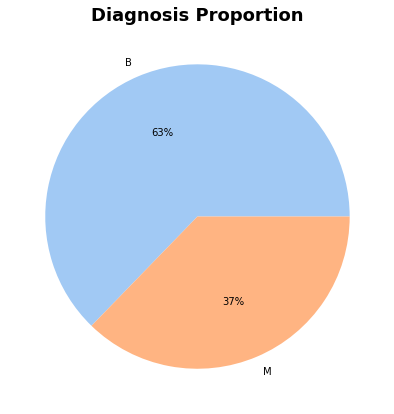

In [20]:
plot.plot_pie(data, 'diagnosis', 'Diagnosis Proportion')

In [21]:
data.value_counts('diagnosis')

diagnosis
B    357
M    212
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

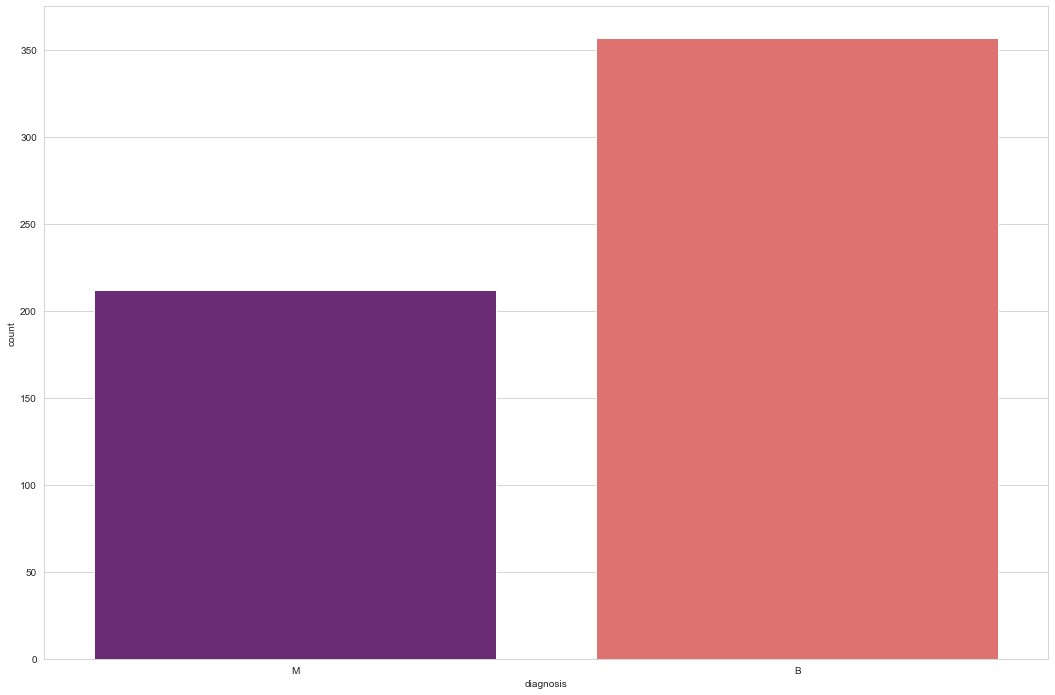

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))
sns.countplot(x="diagnosis", data=data, palette='magma')

This group of samples can be divided into  the maligant and benign group. We will compare each other column with respect to if they have malignant(cancer) or bening tissue(no cancer).

### Univariate Analysis

In [23]:
columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
color = ["crimson", "steelblue", "gold", "chocolate", "darkviolet", "limegreen", "darkorange", "red", "slategrey", "k"]    

<Figure size 648x504 with 0 Axes>

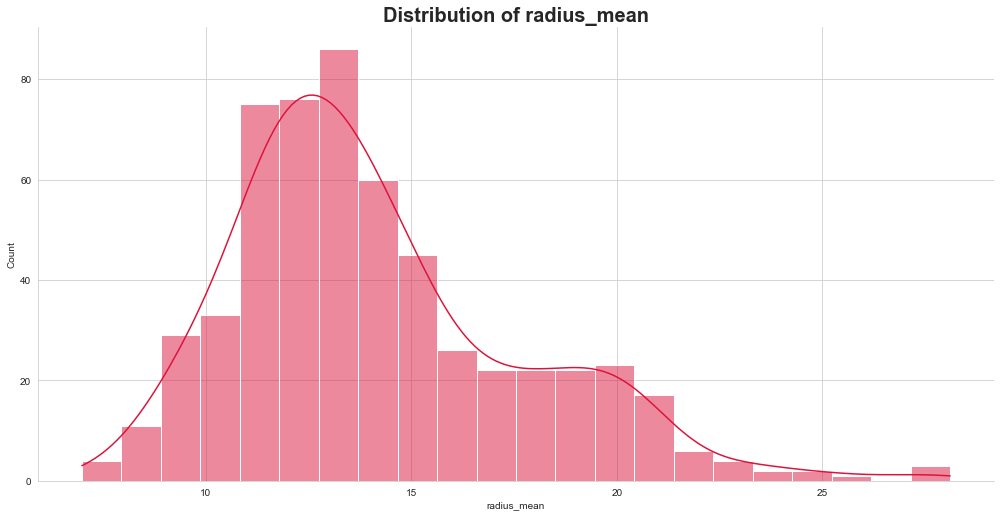

<Figure size 648x504 with 0 Axes>

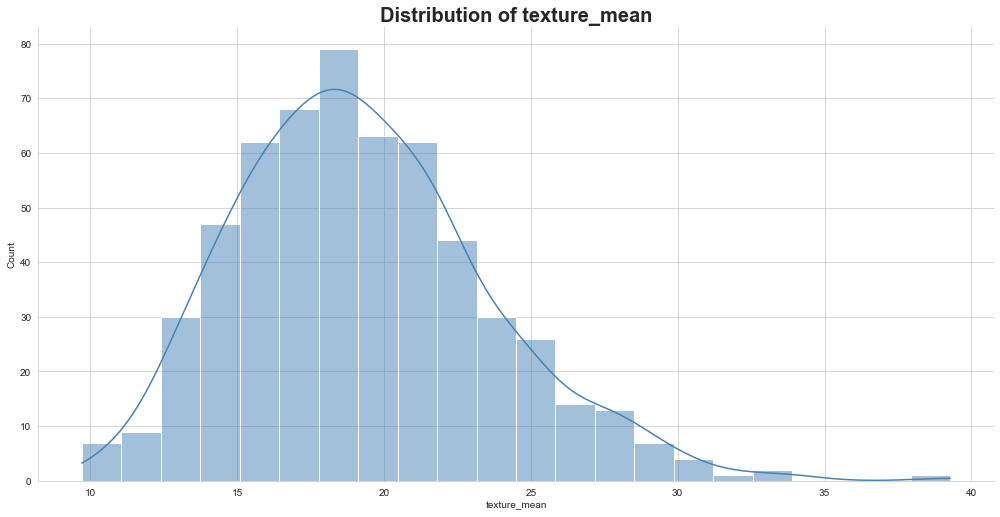

<Figure size 648x504 with 0 Axes>

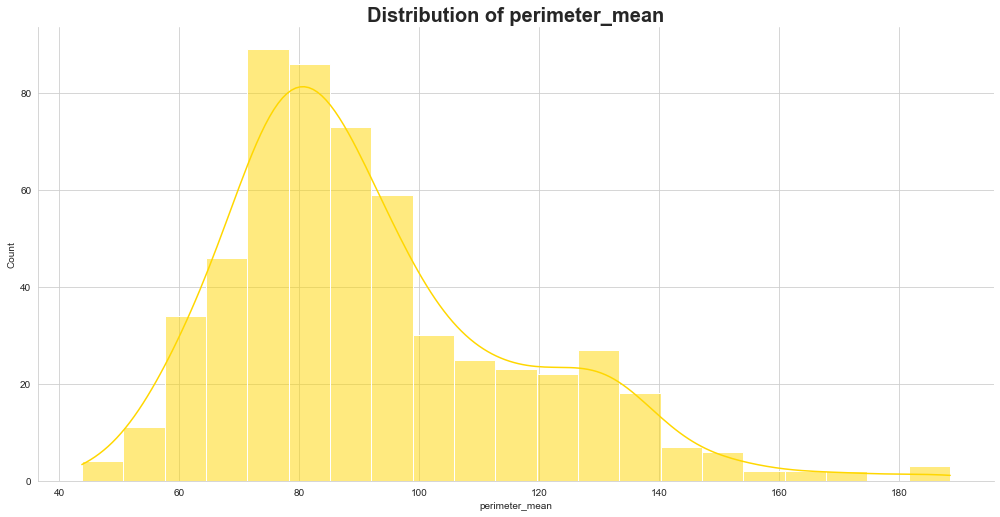

<Figure size 648x504 with 0 Axes>

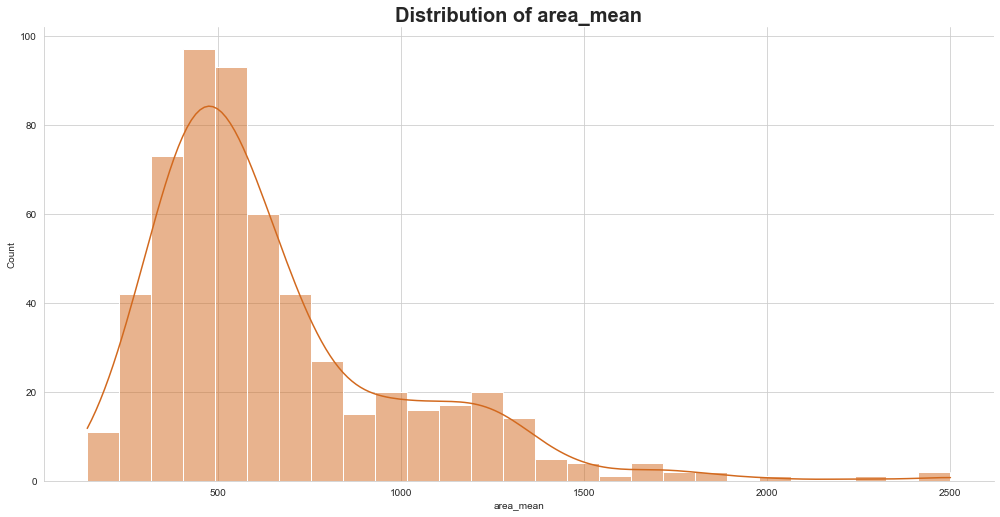

<Figure size 648x504 with 0 Axes>

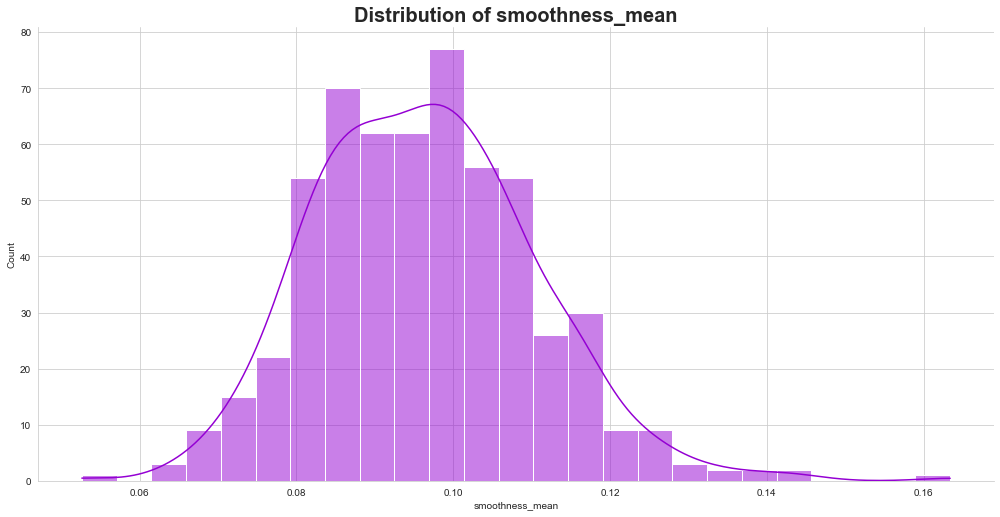

<Figure size 648x504 with 0 Axes>

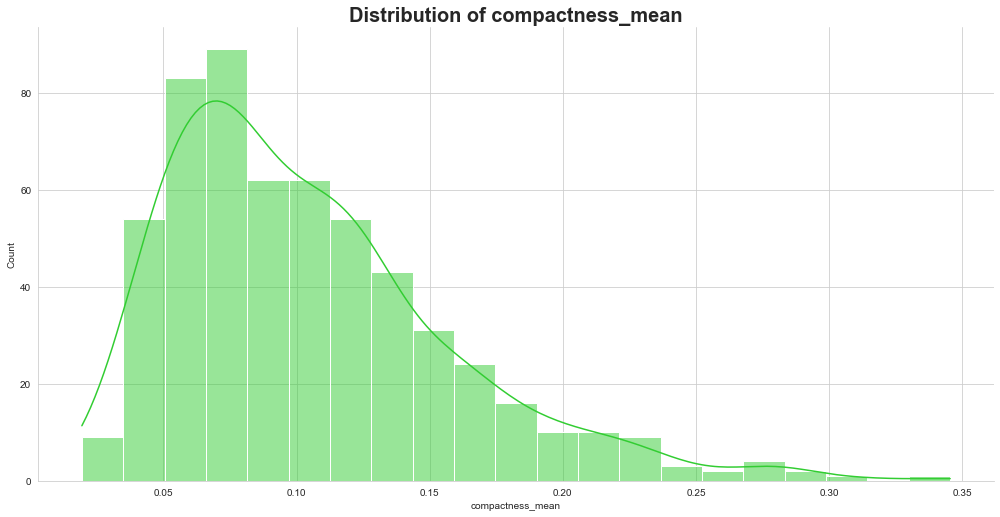

<Figure size 648x504 with 0 Axes>

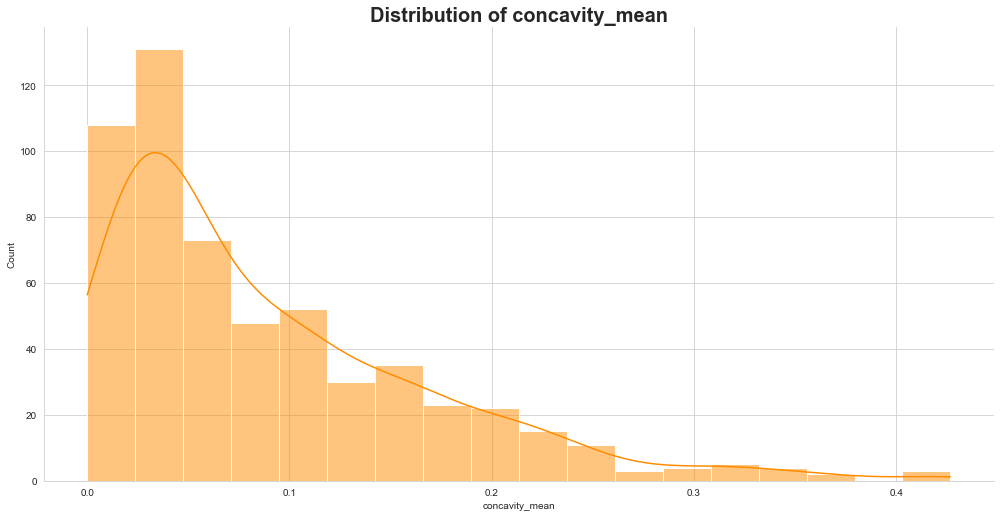

<Figure size 648x504 with 0 Axes>

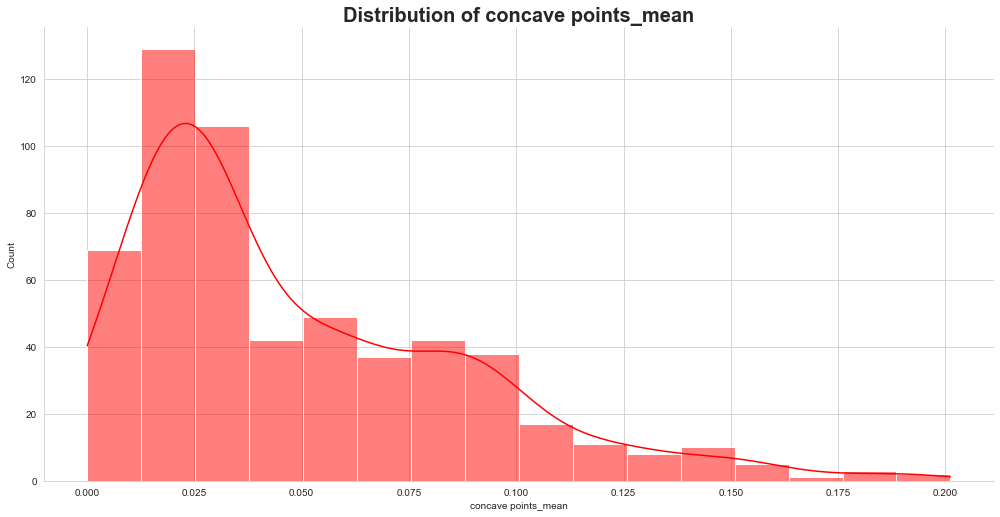

<Figure size 648x504 with 0 Axes>

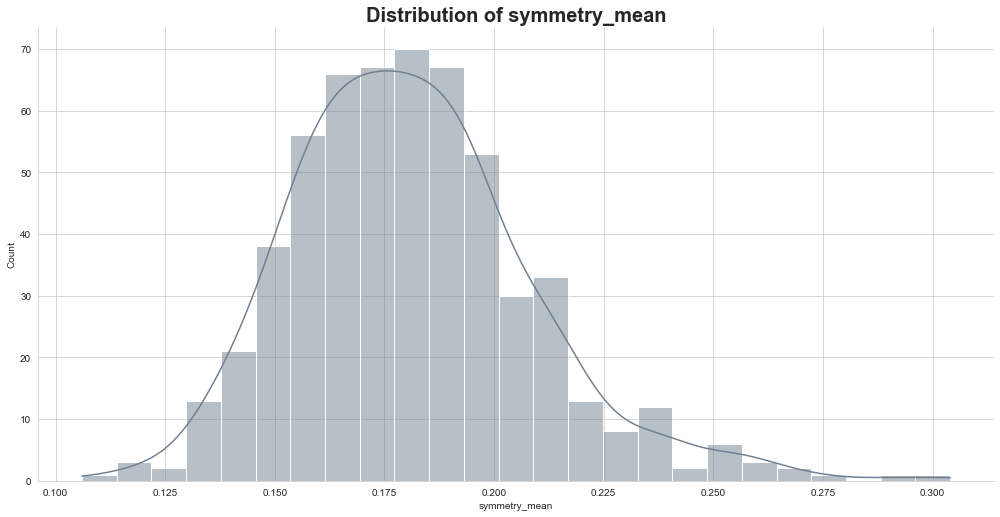

<Figure size 648x504 with 0 Axes>

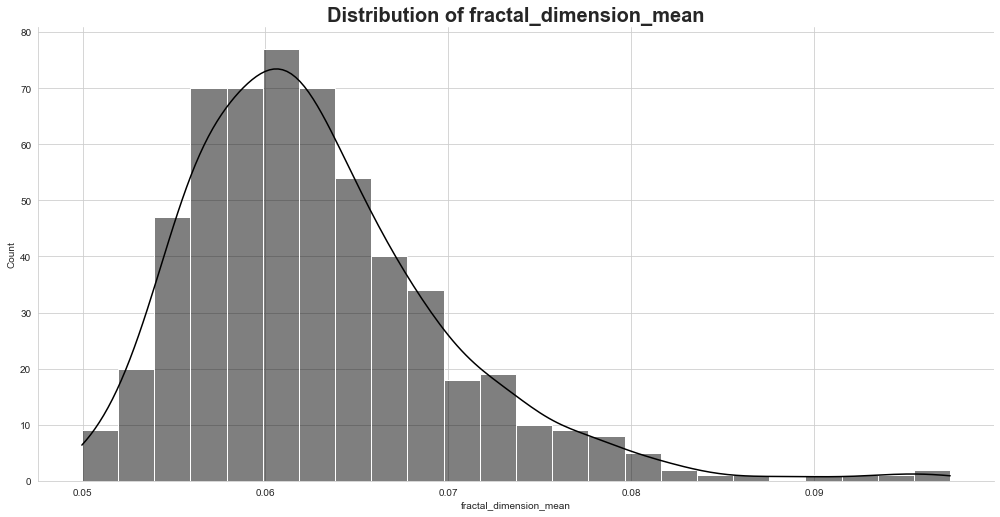

In [24]:
for x in range(len(columns)):
    plot.plot_hist(data, columns[x], color[x])

### Bivariate Analysis

<AxesSubplot:xlabel='symmetry_se', ylabel='radius_worst'>

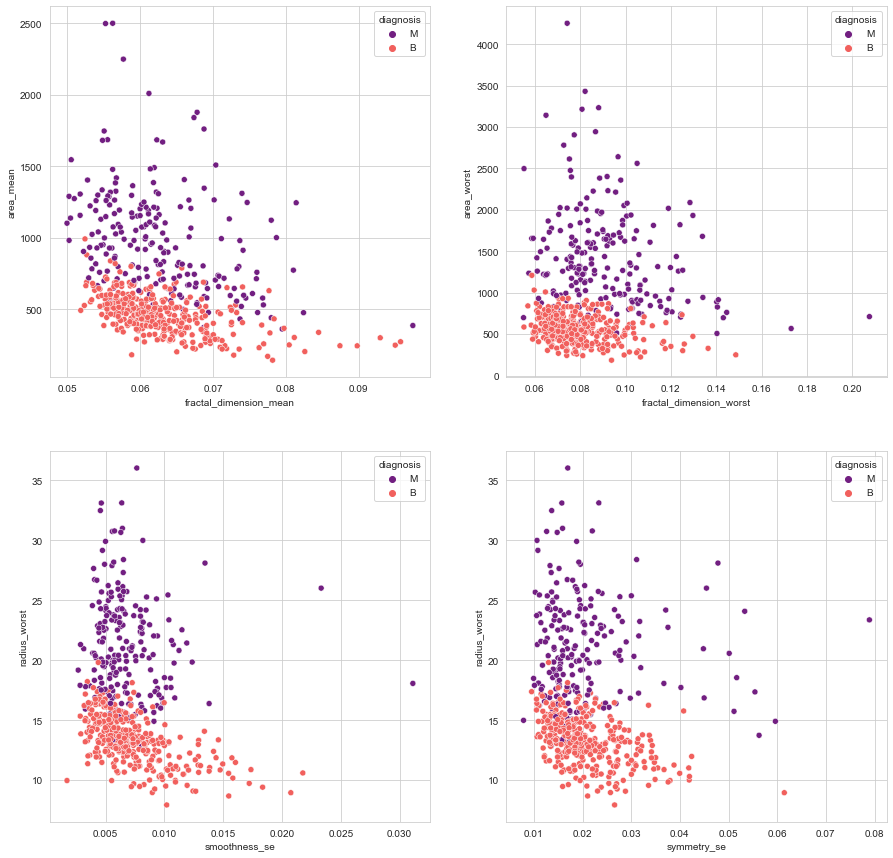

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.scatterplot(x='fractal_dimension_mean', y='area_mean', hue="diagnosis",
                data=data, ax=ax[0][0], palette='magma')
sns.scatterplot(x='fractal_dimension_worst', y='area_worst', hue="diagnosis",
                data=data, ax=ax[0][1], palette='magma')
sns.scatterplot(x='smoothness_se', y='radius_worst', hue="diagnosis",
                data=data, ax=ax[1][0], palette='magma')
sns.scatterplot(x='symmetry_se', y='radius_worst', hue="diagnosis",
                data=data, ax=ax[1][1], palette='magma')

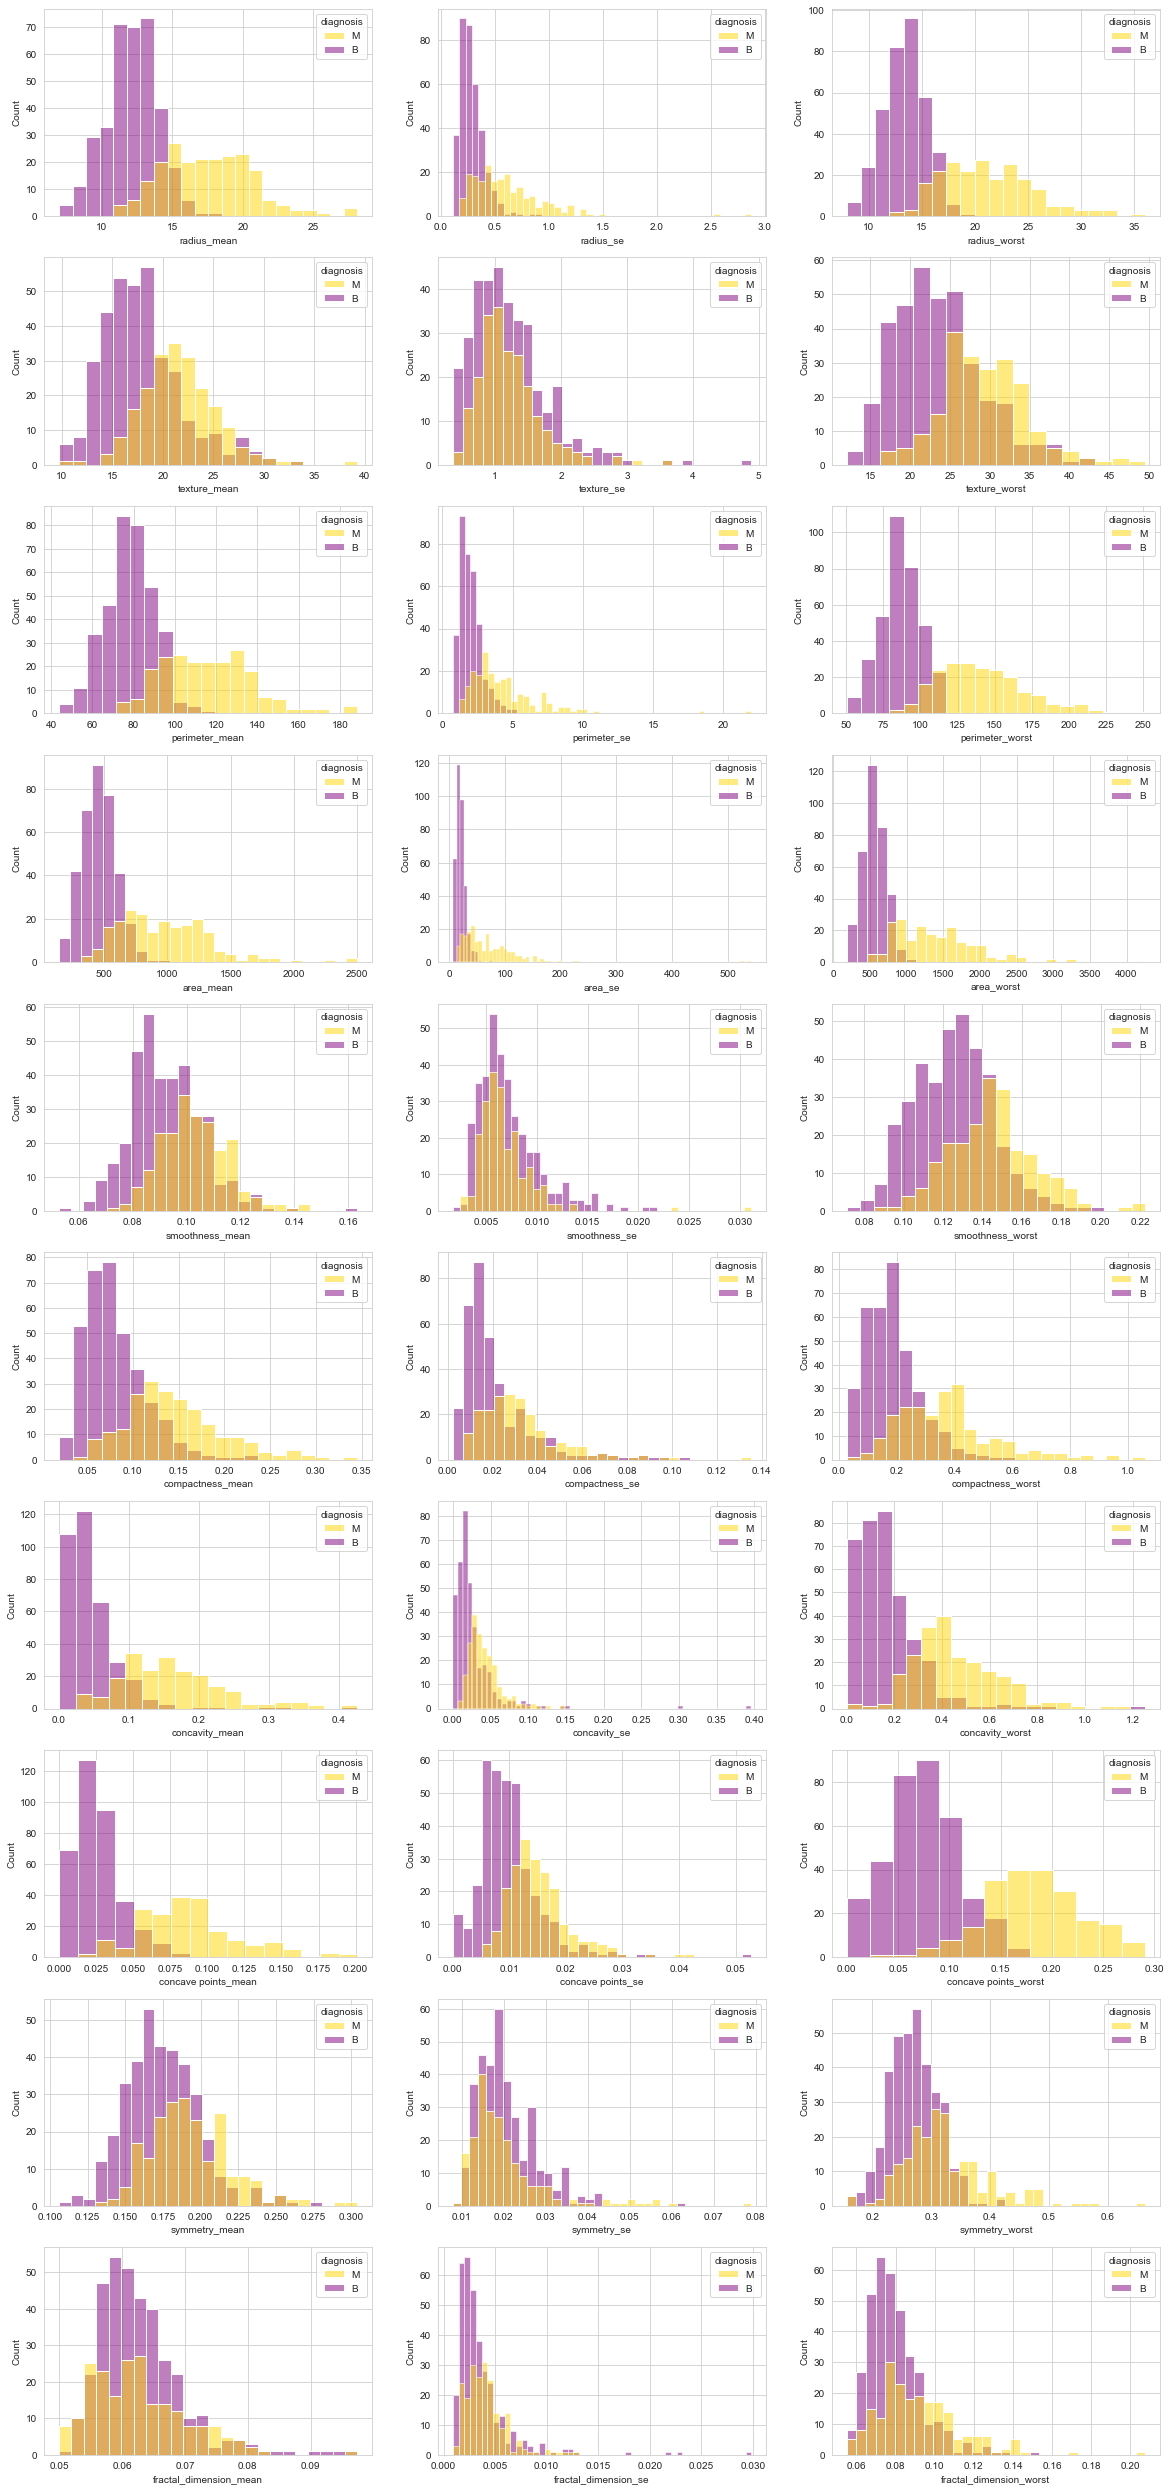

In [26]:
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]
fields = ["mean", "se", "worst"]
plot.bivariate_plot(data,columns,fields)

### Plotting a correlation map of all columns

<AxesSubplot:>

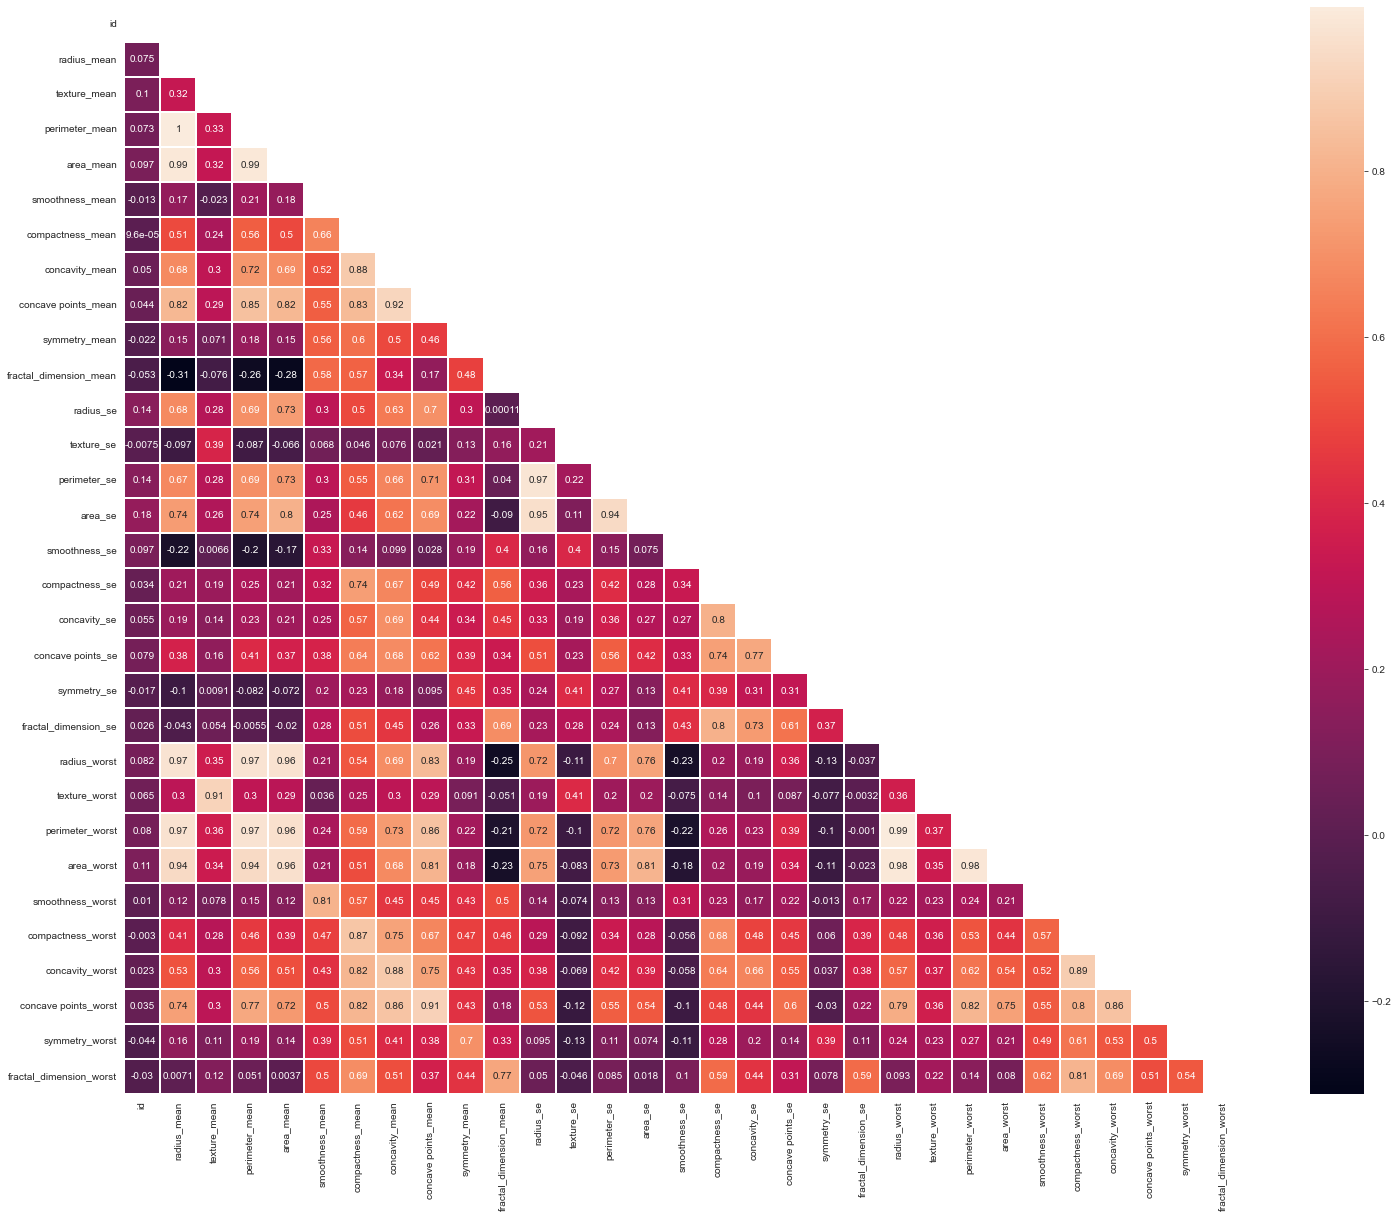

In [27]:
plt.figure(figsize=(25, 20))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=.10, mask=matrix, cmap="rocket")

In [28]:
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
color = ["crimson", "steelblue", "gold", "chocolate", "darkviolet", "limegreen", "darkorange", "red", "slategrey", "k"] 

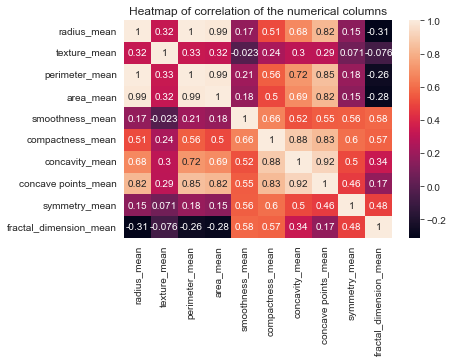

In [29]:
corr = data[mean_col].corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation of the numerical columns')
plt.show()

### Handling outliers

In [30]:
def plot_outlier(df,columns,title):
    sns.set(style="whitegrid")
    data_frame = pd.melt(df, id_vars='diagnosis', value_vars=columns)
    plt.figure(figsize=(12, 6))
    res=sns.boxplot(x='variable', y='value',hue='diagnosis', data=data_frame,palette=["gold", "purple"])
    plt.title(title, size=18, fontweight='bold')
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
    plt.show()

In [31]:
columns2= ['diagnosis', 'concave points_mean', 'radius_worst', 'concave points_worst', 'perimeter_worst','area_mean', 'area_worst','perimeter_mean','radius_mean']

C:\Users\Stella\AppData\Local\Temp\ipykernel_8072\36521128.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)


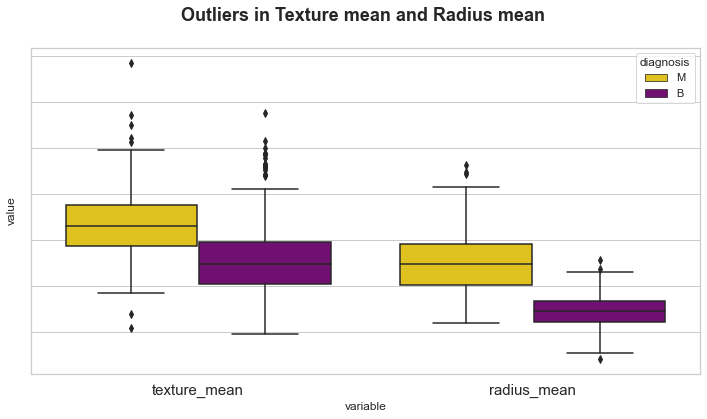

In [32]:
columns = ['texture_mean', 'radius_mean']
plot_outlier(data,columns,'Outliers in Texture mean and Radius mean \n')

### Correcting Outliers

In [33]:
def fix_outlier(df):
    column_name=list(df.columns[2:])
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].median(),np.where(df[i]<lower_quartile,df[i].median(),df[i]))
    return df

C:\Users\Stella\AppData\Local\Temp\ipykernel_8072\36521128.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)


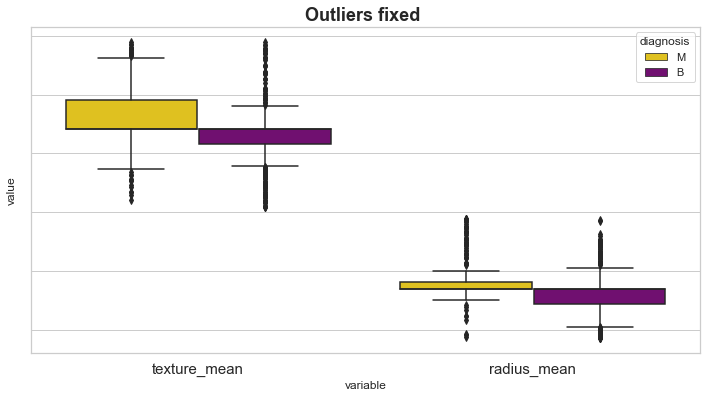

In [34]:
#Fixing the outliers
data_clean = fix_outlier(data)
plot_outlier(data_clean,columns, 'Outliers fixed ')

### Label encoding and scaling

In [35]:
encoded_data= cleaning.encoding_data(data_clean)

In [36]:
def scaler(df):
    df_new = (df-df.min())/(df.max()-df.min())
    return df_new

In [37]:
scaled_data = scaler(encoded_data)

In [38]:
scaled_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.409314,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,...,0.33910,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,0.000915,1.0,0.409314,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,...,0.33910,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,0.092495,1.0,0.409314,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,...,0.33910,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765
3,0.092547,1.0,0.409314,0.747780,0.083305,0.360927,0.501849,0.423183,0.316195,0.245670,...,0.32872,0.627315,0.357472,0.092140,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
4,0.092559,1.0,0.409314,0.474245,0.382648,0.360927,0.735869,0.423183,0.316195,0.245670,...,0.33910,0.501157,0.328167,0.301037,0.707483,0.301199,0.418033,0.362807,0.471111,0.258002


In [39]:
new_data= scaled_data.drop(['id'],axis=1)
new_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.409314,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.33910,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,1.0,0.409314,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,0.571006,...,0.33910,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,1.0,0.409314,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.33910,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765
3,1.0,0.409314,0.747780,0.083305,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.32872,0.627315,0.357472,0.092140,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
4,1.0,0.409314,0.474245,0.382648,0.360927,0.735869,0.423183,0.316195,0.245670,0.562130,...,0.33910,0.501157,0.328167,0.301037,0.707483,0.301199,0.418033,0.362807,0.471111,0.258002


The ID field was dropped because it has minimal significance in this analysis

### Feature Engineering with Random Forest Classifier

In [40]:
X = new_data.drop(["diagnosis"], axis=1)
y = new_data["diagnosis"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=10
)

In [42]:
classifier = RandomForestClassifier(n_estimators=100)

In [43]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
y_pred = classifier.predict(X_test)
print ('Accuracy Score of the random forest regressor is :',accuracy_score(y_test, y_pred))

Accuracy Score of the random forest regressor is : 0.9122807017543859


In [45]:
#Calculating feature Importance from our model on the data
importances = classifier.feature_importances_
labels = X.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False, )
topfeatures_df = feature_df.head(10)
topfeatures_df.shape
topfeatures_df.head()

,feature,importance
27,concave points_worst,0.068985
20,radius_worst,0.067931
26,concavity_worst,0.067032
23,area_worst,0.063766
13,area_se,0.055572


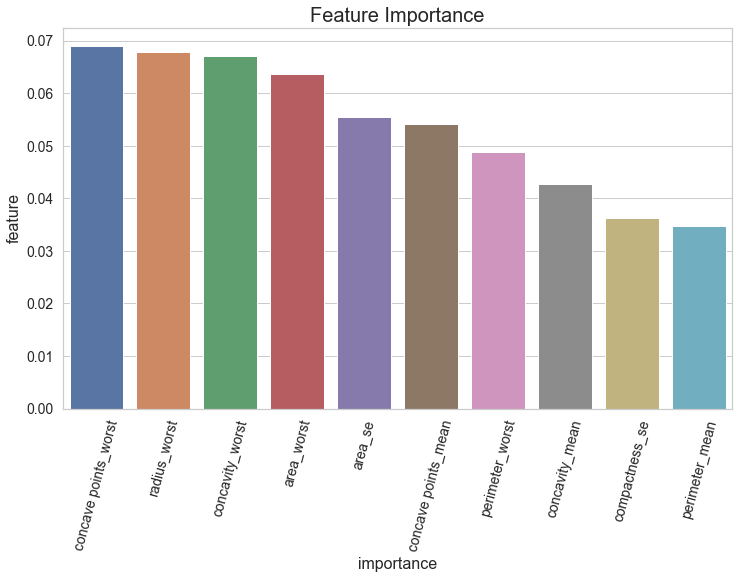

In [46]:
plot.plot_bar(topfeatures_df, 'feature', 'importance', 'Feature Importance', "importance", 'feature', ax=None)

In [47]:
topfeature_columns = topfeatures_df.feature.tolist()
topfeature_columns.insert(0,'diagnosis')
topfeature_columns

['diagnosis',
 'concave points_worst',
 'radius_worst',
 'concavity_worst',
 'area_worst',
 'area_se',
 'concave points_mean',
 'perimeter_worst',
 'concavity_mean',
 'compactness_se',
 'perimeter_mean']

In [48]:
important_data=new_data[topfeature_columns]
important_data.head()

,diagnosis,concave points_worst,radius_worst,concavity_worst,area_worst,area_se,concave points_mean,perimeter_worst,concavity_mean,compactness_se,perimeter_mean
0,1.0,0.362807,0.33910,0.418033,0.301037,0.244331,0.245670,0.328167,0.316195,0.380485,0.382648
1,1.0,0.362807,0.33910,0.473547,0.301037,0.244331,0.928665,0.328167,0.566937,0.000000,0.382648
2,1.0,0.362807,0.33910,0.418033,0.301037,0.244331,0.245670,0.328167,0.316195,0.380485,0.382648
3,1.0,0.362807,0.32872,0.418033,0.092140,0.343087,0.245670,0.357472,0.316195,0.380485,0.083305
4,1.0,0.362807,0.33910,0.418033,0.301037,0.244331,0.245670,0.328167,0.316195,0.595250,0.382648


In [49]:
cleaning.save_clean(important_data)